## Keras -- MLPs on MNIST

In [1]:
%tensorflow_version 1.9
# if your keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.9`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 3s 42us/step - loss: 1.2616 - acc: 0.7113 - val_loss: 0.7992 - val_acc: 0.8424
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.7065 - acc: 0.8454 - val_loss: 0.6013 - val_acc: 0.8665
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5810 - acc: 0.8638 - val_loss: 0.5215 - val_acc: 0.8770
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5208 - acc: 0.8727 - val_loss: 0.4771 - val_acc: 0.8828
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4840 - acc: 0.8782 - val_loss: 0.4482 - val_acc: 0.8873
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4588 - acc: 0.8816 - val_loss: 0.4274 - val_acc: 0.8911
Epoch 7/20
60000/60000 [

Test score: 0.3353958689153194
Test accuracy: 0.9087


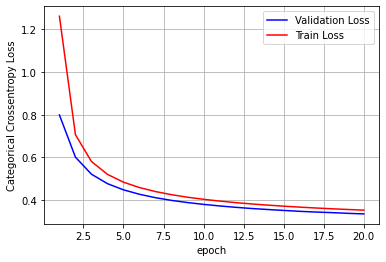

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 2.2699 - acc: 0.2203 - val_loss: 2.2220 - val_acc: 0.4296
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 2.1776 - acc: 0.4451 - val_loss: 2.1204 - val_acc: 0.5472
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 2.0578 - acc: 0.5688 - val_loss: 1.9739 - val_acc: 0.6192
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.8843 - acc: 0.6262 - val_loss: 1.7666 - val_acc: 0.6545
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.6600 - acc: 0.6701 - val_loss: 1.5255 - val_acc: 0.7121
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.4250 - acc: 0.7124 - val_loss: 1.2996 - val_acc: 0.7272
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.2214 - acc: 0.7447 - val_loss: 1.1173 - val_acc

Test score: 0.46628043448925016
Test accuracy: 0.8771


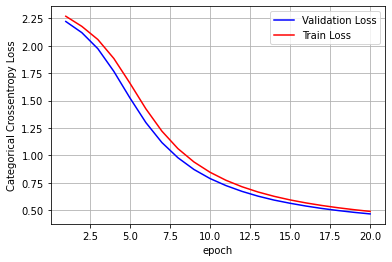

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

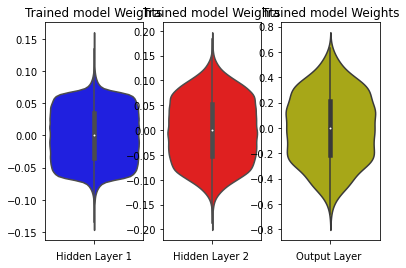

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.5341 - acc: 0.8603 - val_loss: 0.2566 - val_acc: 0.9235
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2208 - acc: 0.9350 - val_loss: 0.1828 - val_acc: 0.9462
Epoch 3/20
60000/60000 [==============================

Test score: 0.07527304192187294
Test accuracy: 0.9806


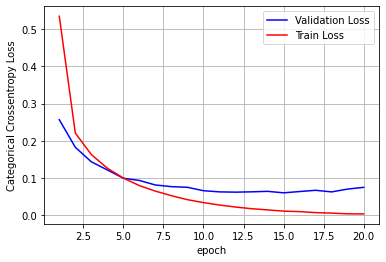

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

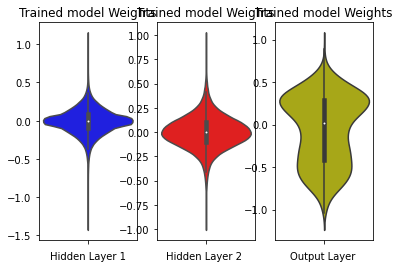

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.7488 - acc: 0.7907 - val_loss: 0.3851 - val_acc: 0.8964
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3489 - acc: 0.9021 - val_loss: 0.2973 - val_acc: 0.9160
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2862 - acc: 0.9180 - val_loss: 0.2582 - val_acc: 0.9274
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2520 - acc: 0.9283 - val_loss: 0.2341 - val_acc: 0.9334
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2282 - acc: 0.9350 - val_loss: 0.2156 - val_acc: 0.9371
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2105 - acc: 0.9404 - val_loss: 0.2025 - val_acc: 0.9417
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1958 - acc: 0.9440 - val_loss: 0.1898 - val_acc

Test score: 0.12213720679543913
Test accuracy: 0.9627


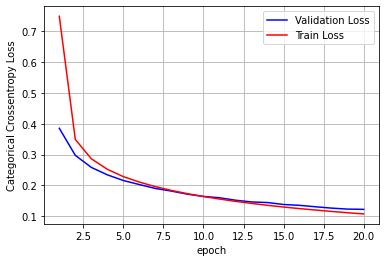

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

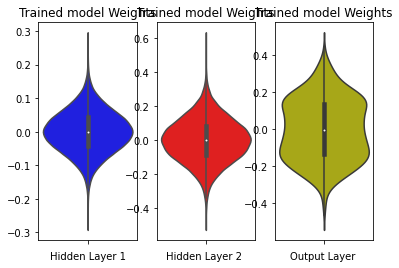

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2344 - acc: 0.9307 - val_loss: 0.1179 - val_acc: 0.9626
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0863 - acc: 0.9736 - val_loss: 0.0837 - val_acc: 0.9713
Epoch 3/20
60000/60000 [=========================

Test score: 0.10837043899441291
Test accuracy: 0.9785


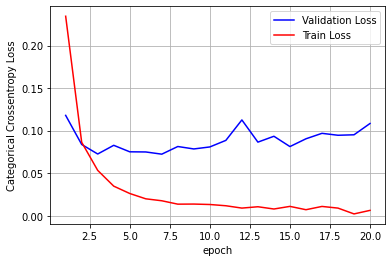

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

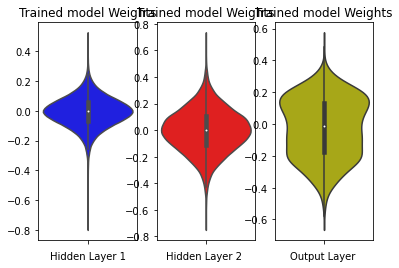

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.3026 - acc: 0.9102 - val_loss: 0.2071 - val_acc: 0.9416
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1736 - acc: 0.9497 - val_loss: 0.1710 - val_acc: 0.9504
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1374 - acc: 0.9598 - val_loss: 0.1511 - val_acc: 0.9542
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1140 - acc: 0.9656 - val_loss: 0.1368 - val_acc: 0.9589
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0949 - acc: 0.9712 - val_loss: 0.1299 - val_acc: 0.9603
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0811 - acc: 0.9755 - val_loss: 0.1175 - val_acc: 0.9647
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0696 - acc: 0.9780 - val_loss: 0.1096 - val_acc

Test score: 0.09913447910312971
Test accuracy: 0.9741


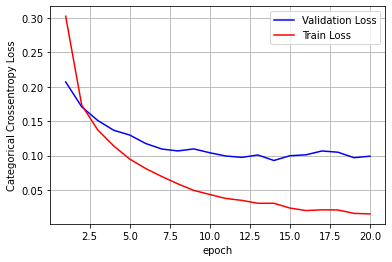

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

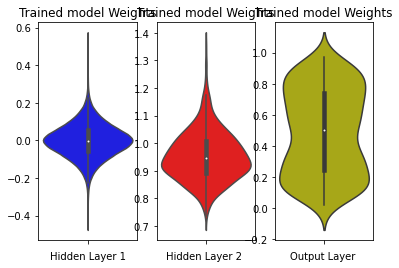

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Batch-Norm using 3 hidden Layers + AdamOptimizer

In [34]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(250, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(200, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(170, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_3 (Batch (None, 250)               1000      
_________________________________________________________________
dense_18 (Dense)             (None, 200)               50200     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dense_19 (Dense)             (None, 170)               34170     
_________________________________________________________________
batch_normalization_5 (Batch (None, 170)               680       
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [35]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2743 - acc: 0.9182 - val_loss: 0.1835 - val_acc: 0.9450
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1370 - acc: 0.9581 - val_loss: 0.1298 - val_acc: 0.9609
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0957 - acc: 0.9707 - val_loss: 0.1306 - val_acc: 0.9613
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0737 - acc: 0.9761 - val_loss: 0.1282 - val_acc: 0.9619
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0569 - acc: 0.9813 - val_loss: 0.1324 - val_acc: 0.9610
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0504 - acc: 0.9826 - val_loss: 0.1231 - val_acc: 0.9630
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0410 - acc: 0.9864 - val_loss: 0.1235 - val_acc

Test score: 0.12309521172174281
Test accuracy: 0.9736


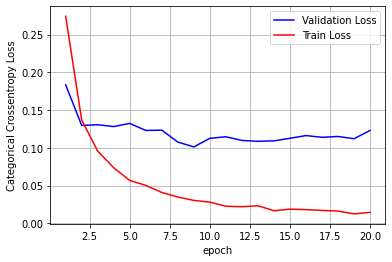

In [36]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

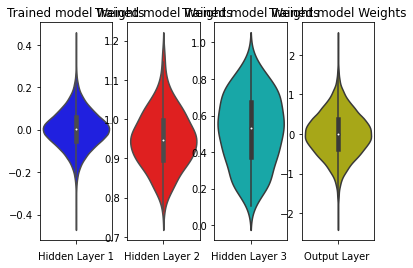

In [37]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Batch-Norm using 5 hidden Layers + AdamOptimizer

In [38]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(600, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(500, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(400, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(300, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(200, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_6 (Batch (None, 600)               2400      
_________________________________________________________________
dense_22 (Dense)             (None, 500)               300500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 500)               2000      
_________________________________________________________________
dense_23 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_8 (Batch (None, 400)               1600      
_________________________________________________________________
dense_24 (Dense)             (None, 300)              

In [39]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2682 - acc: 0.9204 - val_loss: 0.1818 - val_acc: 0.9423
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1321 - acc: 0.9597 - val_loss: 0.1601 - val_acc: 0.9535
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1019 - acc: 0.9677 - val_loss: 0.1247 - val_acc: 0.9618
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0778 - acc: 0.9753 - val_loss: 0.1060 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0701 - acc: 0.9768 - val_loss: 0.1200 - val_acc: 0.9639
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0562 - acc: 0.9818 - val_loss: 0.0947 - val_acc: 0.9727
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0489 - acc: 0.9834 - val_loss: 0.1080 - val_ac

Test score: 0.09593826632477576
Test accuracy: 0.9766


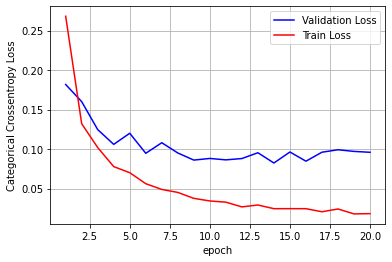

In [40]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

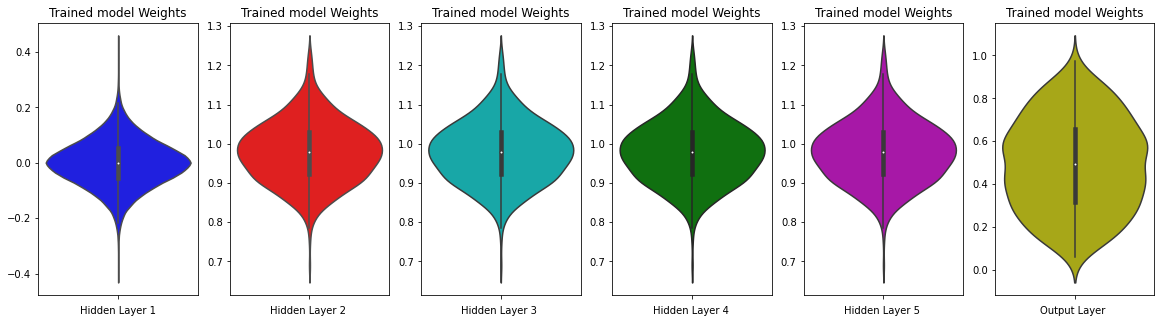

In [41]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
h4_w = w_after[2].flatten().reshape(-1,1)
h5_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='c')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Batch-Norm using 7 hidden Layers + AdamOptimizer

In [42]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(720, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(650, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(580, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(510, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(450, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(390, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 720)               369360    
_________________________________________________________________
batch_normalization_12 (Batc (None, 720)               2880      
_________________________________________________________________
dense_29 (Dense)             (None, 650)               468650    
_________________________________________________________________
batch_normalization_13 (Batc (None, 650)               2600      
_________________________________________________________________
dense_30 (Dense)             (None, 580)              

In [43]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2865 - acc: 0.9165 - val_loss: 0.1705 - val_acc: 0.9518
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1513 - acc: 0.9553 - val_loss: 0.1444 - val_acc: 0.9573
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1115 - acc: 0.9661 - val_loss: 0.1376 - val_acc: 0.9631
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0947 - acc: 0.9707 - val_loss: 0.1137 - val_acc: 0.9671
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0719 - acc: 0.9779 - val_loss: 0.1100 - val_acc: 0.9680
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0656 - acc: 0.9794 - val_loss: 0.1012 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0566 - acc: 0.9824 - val_loss: 0.1200 - 

Test score: 0.09895186286373064
Test accuracy: 0.976


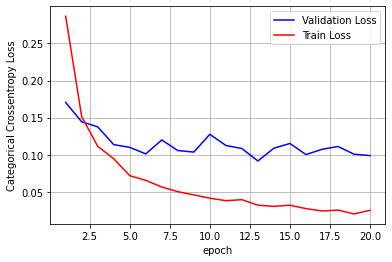

In [44]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

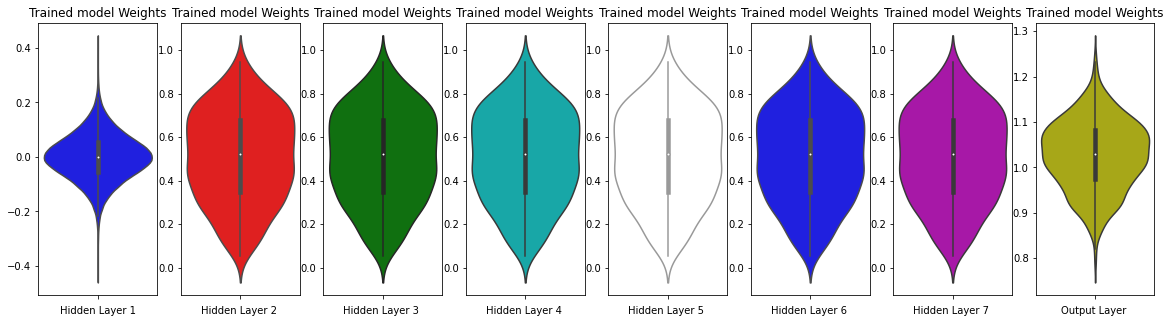

In [45]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[4].flatten().reshape(-1,1)
h6_w = w_after[4].flatten().reshape(-1,1)
h7_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure(figsize =(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='w')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='b')
plt.xlabel('Hidden Layer 6 ')

plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='m')
plt.xlabel('Hidden Layer 7 ')

plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5. MLP + 2 Dropout's + AdamOptimizer

In [46]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________________________

In [47]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.9635 - acc: 0.6934 - val_loss: 0.3132 - val_acc: 0.9074
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.4220 - acc: 0.8755 - val_loss: 0.2321 - val_acc: 0.9292
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.3325 - acc: 0.9022 - val_loss: 0.1930 - val_acc: 0.9415
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2764 - acc: 0.9184 - val_loss: 0.1652 - val_acc: 0.9481
Epoch 5/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2397 - acc: 0.9291 - val_loss: 0.1425 - val_acc: 0.9555
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2129 - acc: 0.9382 - val_loss: 0.1291 - val_acc: 0.9598
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1912 - acc: 0.9437 - val_loss: 0.1180 - val_acc

Test score: 0.06975141780656995
Test accuracy: 0.9789


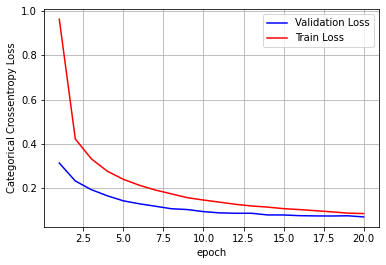

In [48]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

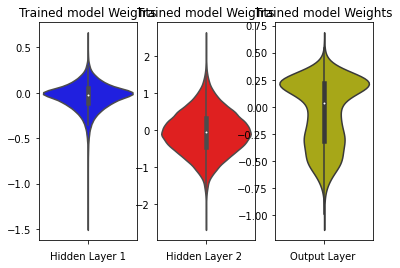

In [49]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

5. MLP + 3 Dropout's + AdamOptimizer

In [55]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(496, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.7))

model_drop.add(Dense(279, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 496)               254448    
_________________________________________________________________
dropout_7 (Dropout)          (None, 496)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 279)               138663    
_________________________________________________________________
dropout_8 (Dropout)          (None, 279)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)              

In [56]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 1.0892 - acc: 0.6844 - val_loss: 0.2835 - val_acc: 0.9236
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.4311 - acc: 0.8779 - val_loss: 0.2002 - val_acc: 0.9486
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3407 - acc: 0.9052 - val_loss: 0.1691 - val_acc: 0.9541
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2960 - acc: 0.9193 - val_loss: 0.1497 - val_acc: 0.9589
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2601 - acc: 0.9295 - val_loss: 0.1421 - val_acc: 0.9587
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2414 - acc: 0.9342 - val_loss: 0.1290 - val_acc: 0.9637
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2259 - acc: 0.9382 - val_loss: 0.1269 - val_acc

Test score: 0.10485141305003781
Test accuracy: 0.9747


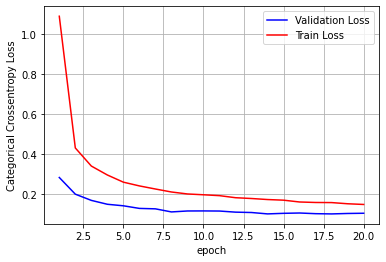

In [57]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

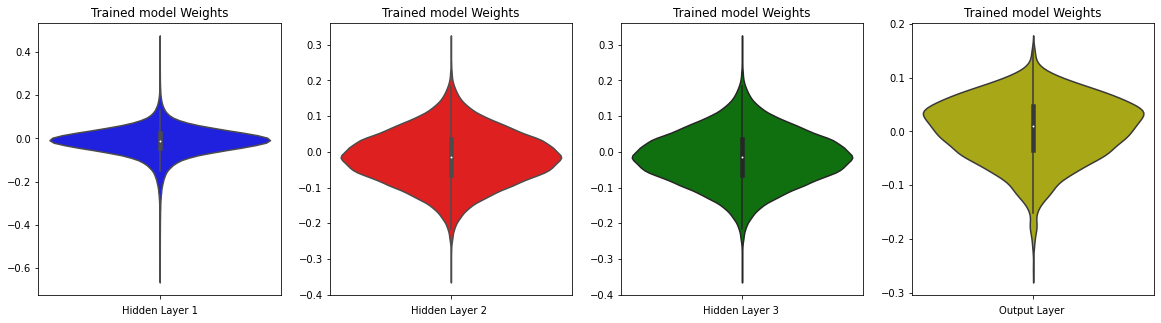

In [58]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

5. MLP + Batch-norm + 5 Dropout's + AdamOptimizer

In [60]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.4))

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.8))
                       
model_drop.add(Dense(638, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.25))

model_drop.add(Dense(381, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.17))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 420)               329700    
_________________________________________________________________
dropout_14 (Dropout)         (None, 420)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               53888     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 638)             

In [61]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 1.0027 - acc: 0.6563 - val_loss: 0.2651 - val_acc: 0.9257
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4191 - acc: 0.8818 - val_loss: 0.1868 - val_acc: 0.9475
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.3330 - acc: 0.9082 - val_loss: 0.1680 - val_acc: 0.9538
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2898 - acc: 0.9219 - val_loss: 0.1554 - val_acc: 0.9593
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2577 - acc: 0.9315 - val_loss: 0.1381 - val_acc: 0.9618
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2448 - acc: 0.9360 - val_loss: 0.1366 - val_acc: 0.9634
Epoch 7/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2306 - acc: 0.9408 - val_loss: 0.1331 - val_acc

Test score: 0.10725452537201345
Test accuracy: 0.974


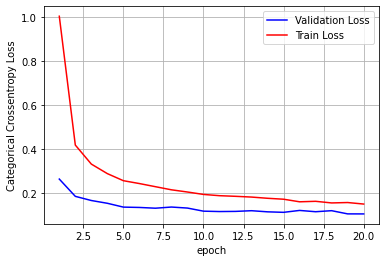

In [62]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

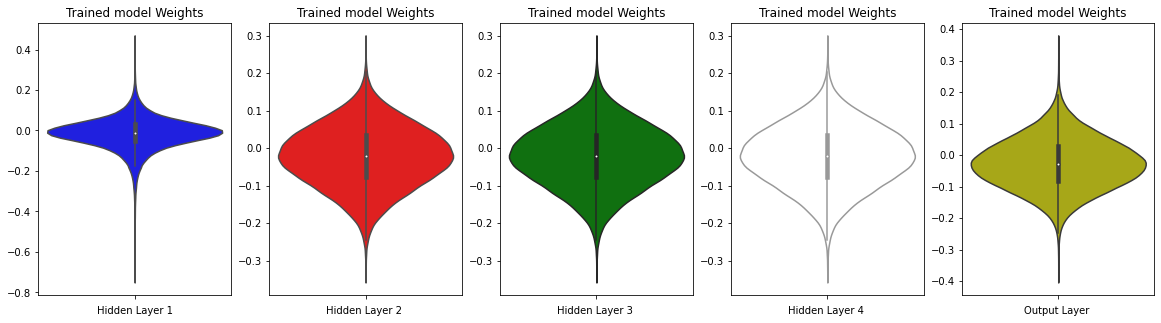

In [63]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1,5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='w')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 6. MLP + Batch-norm + Dropout + AdamOptimizer </h2>

In [64]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_19 (Batc (None, 128)               512       
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)              

In [65]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.6686 - acc: 0.7923 - val_loss: 0.2930 - val_acc: 0.9139
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.4310 - acc: 0.8690 - val_loss: 0.2566 - val_acc: 0.9244
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3884 - acc: 0.8829 - val_loss: 0.2397 - val_acc: 0.9287
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3559 - acc: 0.8929 - val_loss: 0.2211 - val_acc: 0.9332
Epoch 5/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3343 - acc: 0.8995 - val_loss: 0.2093 - val_acc: 0.9383
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3218 - acc: 0.9037 - val_loss: 0.2034 - val_acc: 0.9403
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3060 - acc: 0.9067 - val_loss: 0.1909 - val_acc

Test score: 0.11045308456420898
Test accuracy: 0.967


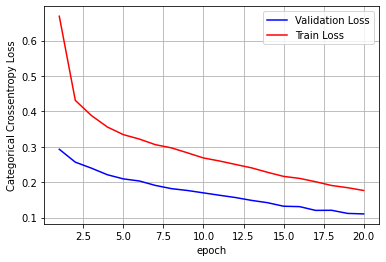

In [66]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

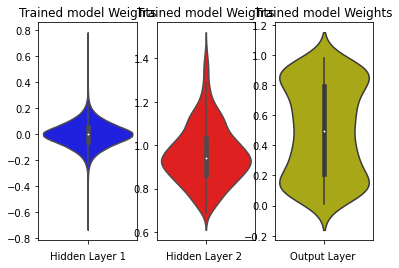

In [67]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP +Bath-norm + 7 Dropout's + AdamOptimizer

In [68]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(346, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.63))

model_drop.add(Dense(496, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.57))

model_drop.add(Dense(639, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.19))

model_drop.add(Dense(99, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.87))

model_drop.add(Dense(750, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.1))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 346)             

In [69]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 2.0071 - acc: 0.2829 - val_loss: 0.9487 - val_acc: 0.6370
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 1.0671 - acc: 0.6132 - val_loss: 0.5183 - val_acc: 0.7925
Epoch 3/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.7805 - acc: 0.7487 - val_loss: 0.3428 - val_acc: 0.9032
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.6172 - acc: 0.8172 - val_loss: 0.2718 - val_acc: 0.9270
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.5131 - acc: 0.8576 - val_loss: 0.2597 - val_acc: 0.9339
Epoch 6/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.4693 - acc: 0.8768 - val_loss: 0.1974 - val_acc: 0.9508
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.4160 - acc: 0.8938 - val_loss: 0.1824 -

Test score: 0.1184512525127735
Test accuracy: 0.9742


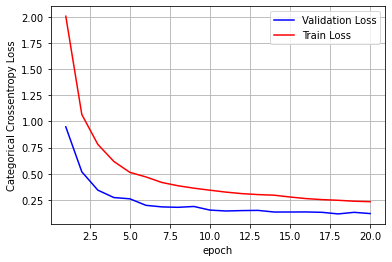

In [70]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

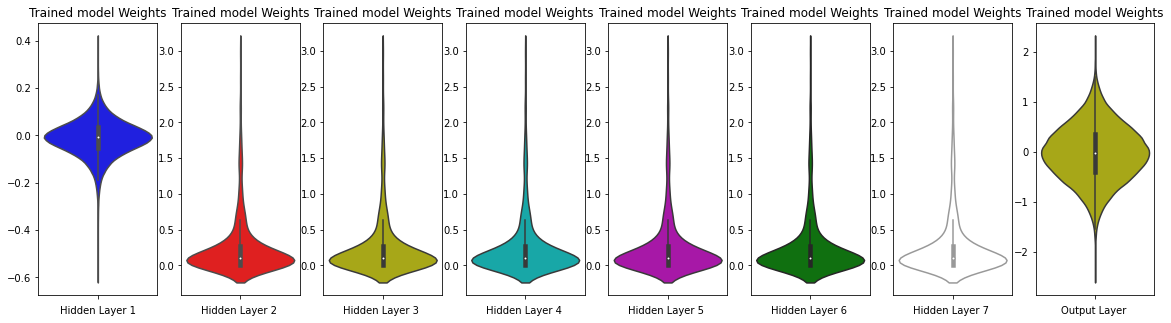

In [71]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[4].flatten().reshape(-1,1)
h6_w = w_after[4].flatten().reshape(-1,1)
h7_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 8, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 8, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 8, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 8, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 8, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 8, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h6_w, color='g')
plt.xlabel('Hidden Layer 6 ')

plt.subplot(1, 8, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h7_w, color='w')
plt.xlabel('Hidden Layer 7 ')

plt.subplot(1, 8, 8)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Batch-norm+ 3 Dropout's + AdamOptimizer

In [72]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(624, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(370, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(82, activation='sigmoid', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 624)               489840    
_________________________________________________________________
batch_normalization_27 (Batc (None, 624)               2496      
_________________________________________________________________
dropout_28 (Dropout)         (None, 624)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 370)               231250    
_________________________________________________________________
batch_normalization_28 (Batc (None, 370)               1480      
_________________________________________________________________
dropout_29 (Dropout)         (None, 370)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 82)              

In [73]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.5687 - acc: 0.8232 - val_loss: 0.2728 - val_acc: 0.9202
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3768 - acc: 0.8873 - val_loss: 0.2421 - val_acc: 0.9277
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3294 - acc: 0.9004 - val_loss: 0.2071 - val_acc: 0.9396
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3011 - acc: 0.9099 - val_loss: 0.1889 - val_acc: 0.9442
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2769 - acc: 0.9174 - val_loss: 0.1728 - val_acc: 0.9474
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2623 - acc: 0.9220 - val_loss: 0.1624 - val_acc: 0.9520
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2459 - acc: 0.9254 - val_loss: 0.1512 - val_ac

Test score: 0.09171288008186966
Test accuracy: 0.9726


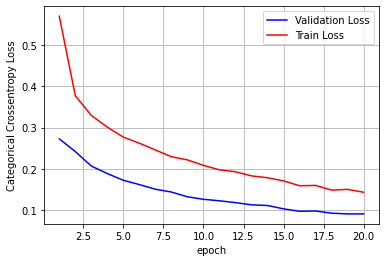

In [74]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

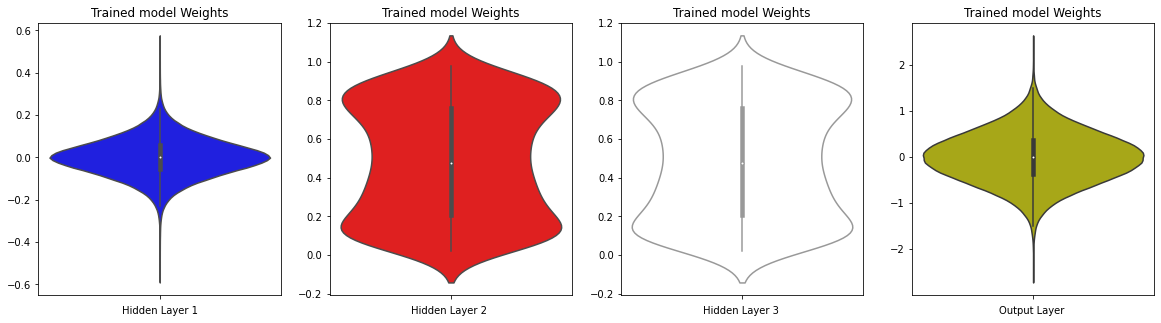

In [75]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='w')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP +Batch-norm + 5 Dropout's + AdamOptimizer

In [76]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(710, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(623, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(548, activation='sigmoid', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.8))

model_drop.add(Dense(475, activation='sigmoid', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))

model_drop.add(Dense(316, activation='sigmoid', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed = None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.37))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 710)               557350    
_________________________________________________________________
batch_normalization_30 (Batc (None, 710)               2840      
_________________________________________________________________
dropout_31 (Dropout)         (None, 710)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 623)               442953    
_________________________________________________________________
batch_normalization_31 (Batc (None, 623)               2492      
_________________________________________________________________
dropout_32 (Dropout)         (None, 623)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 548)             

In [77]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.9838 - acc: 0.6901 - val_loss: 0.3823 - val_acc: 0.9008
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.5394 - acc: 0.8332 - val_loss: 0.2944 - val_acc: 0.9163
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.4524 - acc: 0.8621 - val_loss: 0.2613 - val_acc: 0.9254
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.4109 - acc: 0.8760 - val_loss: 0.2539 - val_acc: 0.9267
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3879 - acc: 0.8828 - val_loss: 0.2362 - val_acc: 0.9329
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3642 - acc: 0.8904 - val_loss: 0.2155 - val_acc: 0.9381
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3487 - acc: 0.8970 - val_loss: 0.2056 - val_ac

Test score: 0.12741360827535392
Test accuracy: 0.9651


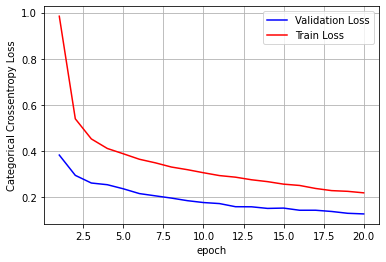

In [78]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

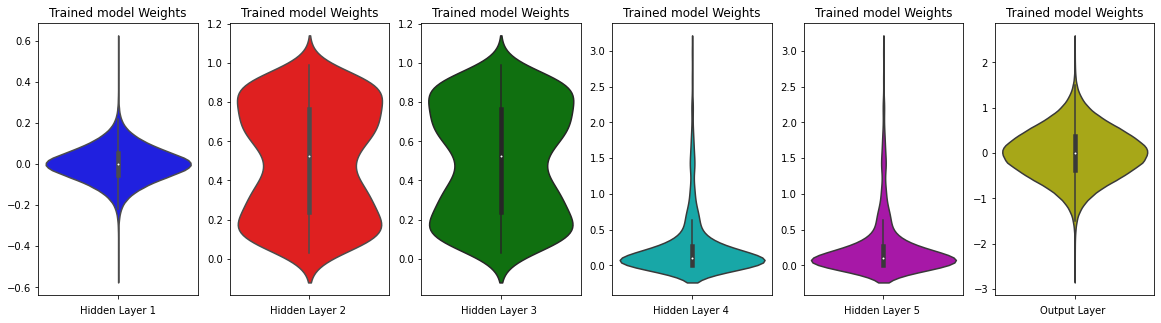

In [79]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs =-1)
grid_result = grid.fit(X_train, Y_train)

In [82]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977383 using {'activ': 'sigmoid'}
0.977383 (0.001965) with: {'activ': 'sigmoid'}
0.976550 (0.003953) with: {'activ': 'relu'}


In [98]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
ptable = PrettyTable()

ptable.field_names = [ "Model", "Accuracy"]
ptable.add_row(["softmax",90.87])
ptable.add_row(["MLP+Sigmoid+SGDoptimizer",87.71])
ptable.add_row(["MLP+Sigmoid+ADAM",98.06])
ptable.add_row(["MLP+SGD+ReLU",96.27])
ptable.add_row(["MLP+ReLU+ADAM",97.6])
print(ptable)

ptable = PrettyTable()
ptable.field_names =["Model","Layers","Accuracy"]
ptable.add_row(["MLP+Batch-norm+ADAM",2,97.41])
ptable.add_row(["MLP+Batch-norm+ADAM",3,97.36])
ptable.add_row(["MLP+Batch-norm+ADAM",5,97.66])
ptable.add_row(["MLP+Batch-norm+ADAM",7,97.6])
print(ptable)

ptable = PrettyTable()
ptable.field_names= ["Model","dropouts","Accuracy"]
ptable.add_row(["MLP+dropouts+ADAM",2,97.89])
ptable.add_row(["MLP+Dropouts+ADAM",3,97.47])
ptable.add_row(["MLP+Dropouts+adam",5,97.4])
print(ptable)

ptable = PrettyTable()
ptable.field_names= ["Model","dropouts","layers","Accuracy"]
ptable.add_row(["MLP+Batch-norm+ADAM+DROPOUTS",2,2,96.7])
ptable.add_row(["MLP+Batch-norm+ADAM+DROPOUTS",7,7,97.42])
ptable.add_row([" MLP+Batch-norm+ADAM", 3,3,97.26 ])
ptable.add_row([" MLP+Batch-norm+ADAM+DROPOUTS", 5,5,96.51])
print(ptable)

+--------------------------+----------+
|          Model           | Accuracy |
+--------------------------+----------+
|         softmax          |  90.87   |
| MLP+Sigmoid+SGDoptimizer |  87.71   |
|     MLP+Sigmoid+ADAM     |  98.06   |
|       MLP+SGD+ReLU       |  96.27   |
|      MLP+ReLU+ADAM       |   97.6   |
+--------------------------+----------+
+---------------------+--------+----------+
|        Model        | Layers | Accuracy |
+---------------------+--------+----------+
| MLP+Batch-norm+ADAM |   2    |  97.41   |
| MLP+Batch-norm+ADAM |   3    |  97.36   |
| MLP+Batch-norm+ADAM |   5    |  97.66   |
| MLP+Batch-norm+ADAM |   7    |   97.6   |
+---------------------+--------+----------+
+-------------------+----------+----------+
|       Model       | dropouts | Accuracy |
+-------------------+----------+----------+
| MLP+dropouts+ADAM |    2     |  97.89   |
| MLP+Dropouts+ADAM |    3     |  97.47   |
| MLP+Dropouts+adam |    5     |   97.4   |
+-------------------+---